In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
tf.__version__
import pandas as pd
import tensorflow as tf
df=pd.read_csv('/content/drive/MyDrive/zomato.csv')
df=df.drop(['phone','dish_liked','rate','menu_item'],axis=1)
df.drop_duplicates(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
df.isna().sum()

df.dropna()
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),346


In [3]:

import re
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: re.sub(',', '', x)).astype(float).dropna()
df.dropna().isna().sum()
df.head(2)

,url,address,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [4]:
df=df.rename(columns={'approx_cost(for two people)': 'cost',
           'listed_in(type)': 'type',
           'listed_in(city)': 'city'
           })
df.head(2)

,url,address,name,online_order,book_table,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


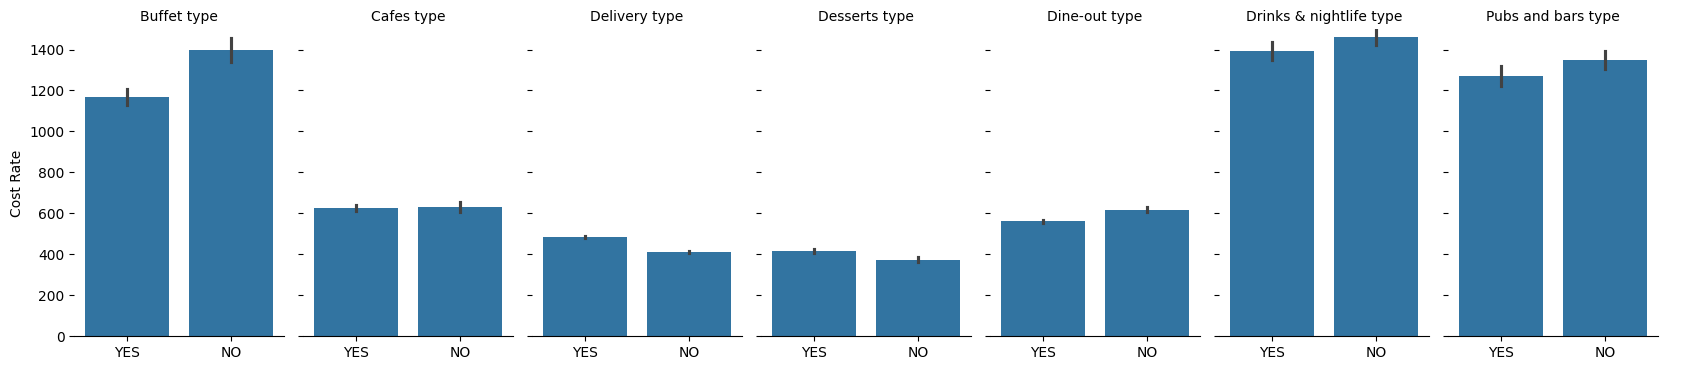

In [5]:

import matplotlib as plt
import seaborn as sns
#df['type'].value_counts().plot(kind='bar') #online_order
g = sns.catplot(data=df, x="online_order", y="cost",col="type",
    kind="bar", height=4, aspect=.6,
    #cmap="coolwarm"
)
plt.rcParams['figure.figsize'] = [10,5]
g.set_axis_labels("", "Cost Rate")
g.set_xticklabels(["YES","NO"])

g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1500))
g.despine(left=True)

##workin on the online delivery

In [6]:
order_online=df[df.online_order=='Yes']
order_online_only=order_online.drop_duplicates()

order_online=order_online.drop('online_order',axis=1)
print(order_online)

                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
5      https://www.zomato.com/bangalore/timepass-dinn...   
7      https://www.zomato.com/bangalore/onesta-banash...   
...                                                  ...   
51697  https://www.zomato.com/bangalore/shizusan-shop...   
51699  https://www.zomato.com/bangalore/harrys-bar-ca...   
51701  https://www.zomato.com/bangalore/the-beer-cafe...   
51703  https://www.zomato.com/bangalore/olivers-pub-d...   
51705  https://www.zomato.com/bangalore/izakaya-gastr...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
5      37, 5-1, 4th Floor, Bosco Court,

In [7]:
import matplotlib as plt
v=(order_online.cuisines.str.split(',',expand=True).stack().value_counts())
#sns.barplot(y=v.index,x=v.values,hue=v)
plt.rcParams['figure.figsize'] = [10,5]
((v/v.sum()*100)>1).sum() #head(26)
v.rename(index='count')

,count
Chinese,7578
North Indian,7182
North Indian,5236
Fast Food,3505
Cafe,2599
...,...
Grill,2
Pan Asian,1
Bar Food,1
Raw Meats,1


In [8]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Sample data preparation
# Replace this with your data import if needed

# Group data by location and calculate the sum of votes for each cost range
order_online['cost_range'] = pd.cut(order_online['cost'], bins=[0, 500, 1000, 1500, 2000, order_online['cost'].max()], labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000+']).sort_values()
grouped_data = order_online.groupby(['location', 'cost_range'])['votes'].sum().reset_index()

# Create a stacked bar chart
fig = px.bar(grouped_data, x='location', y='votes', color='cost_range', title="Stacked Bar Chart of Votes by Location and Cost Range")
fig.show()


<ipython-input-8-6020ea30a61b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = order_online.groupby(['location', 'cost_range'])['votes'].sum().reset_index()


In [10]:
# Visualization 4: Interactive Scatter Plot of Cost vs Votes by Location
fig = px.scatter(order_online, x='cost', y='votes', color='location', title="Cost vs Votes by Location")
fig.show()

In [11]:
import pandas as pd
import plotly.express as px

# Load the data
# Replace 'restaurant_data.csv' with your actual dataset file path
#data = pd.read_csv('restaurant_data.csv')

# Fill NaN values in 'cuisines' column with a placeholder and extract the primary cuisine
order_online['cuisines'] = order_online['cuisines'].fillna('Unknown')
order_online['primary_cuisine'] = order_online['cuisines'].apply(lambda x: x.split(',')[0]).sort_values()

# Count the number of restaurants by primary cuisine and location
cuisine_counts = order_online.groupby(['location', 'primary_cuisine']).size().reset_index(name='count')

# Create a stacked bar chart
fig = px.bar(cuisine_counts, x='location', y='count', color='primary_cuisine',
             title="Count of Restaurants by Cuisine Type and Location",
             labels={'count': 'Number of Cuisine', 'location': 'Location'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()


In [ ]:
order_online.name.unique().shape

(4418,)

<ipython-input-12-05a132d39e67>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'YES'), Text(0, 1, 'NO')]

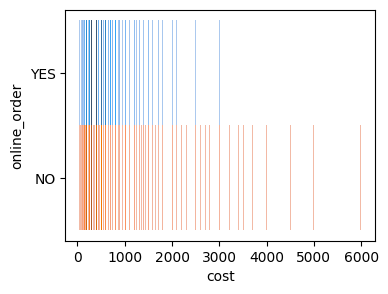

In [12]:
plt.rcParams['figure.figsize'] = [4,3]
g=sns.histplot(
    df, x="cost", y="online_order",hue="online_order",legend=False,

)
g.set_yticklabels(["YES","NO"])

#sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species")

In [ ]:
data=order_online[['reviews_list','ratings']]
l=data.reviews_list.apply(len)
data=data.drop(data[l == l.min()].index)   # clean the empty list from the data
data.shape

(28339, 2)

In [ ]:
import string
string.punctuation
data['reviews_list']=data.reviews_list.apply(lambda x: [char for char in x if char not in string.punctuation]).apply(lambda x: ''.join(x)).replace(' RATEDn ','',regex=True)
data.reviews_list.iloc[1]

' Had been here for dinner with family Turned out to be a good choose suitable for all ages of people Can try this place We liked the most was their starters Service is good Prices are affordable Will recommend this restaurant for early dinner The place is little noisy  The ambience is really nice staff is courteous The price is pretty high for the quantity but overall the experience was fine The quality of food is nice but nothing extraordinary They also have buffetonly veg  I felt good is little expensive for the quantity they serve and In terms of taste is decent There is nothing much to talk about the ambience regular casual dining restaurant where you can take your family for dinner or lunch If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers  I was looking for a quite place to spend some time with family and as well wanted to try some new place Since I was at Banashankari I t

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


,count
ratings,
1,17386
0,10953


' We went here for a team lunch The ambience was very okayish The good thing was arranging buffet in a separate room as it normally gets crowded during peak timennThe veg starters were good and the options were also varying I found the mains options very less and also the taste was very average Some desserts were good but there were no eggless nonindian dessert  Even the food drinks and ambiance was good the music was too low for a Saturday night Apart from the music the waiter tried to fool us at the time of billing by applying the Zomato Gold on  drink instead of  Probably he thought we were too drunk and dumb to realise but we came out clean Service was too slow and the management was poor  Went on Friday evening with my teamhad a wonderful time  enjoyed a lotGood food as well as their brewed beer was awesomeGood ambience music was decentall of their brewed beer  German wheat is the best one Happy with friendly hospitality by Mr Dipen Chettri who was our server through out the night

# sample 3000

In [17]:
from tqdm import tqdm
all_ratings = []
for name, ratings in tqdm(zip(order_online['name'][:3000], order_online['reviews_list'][:3000])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name, score, doc])

3000it [00:02, 1079.31it/s]


#Sample 10k size

In [ ]:
sample_order=order_online.sample(n=10000)

In [ ]:
all_ratings = []
from tqdm.notebook import tqdm

for name,ratings in tqdm(zip(order_online['name'],order_online['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

0it [00:00, ?it/s]

In [ ]:
import re
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [ ]:
rating_df

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...
...,...,...,...
831119,Oliver's Pub & Diner,2.0,Pathetic presentation of the dishes the plate ...
831120,Oliver's Pub & Diner,3.0,Went there on a Friday eve They were out of al...
831121,Oliver's Pub & Diner,4.0,Olivers Pub is a decent place with a good ambi...
831122,Izakaya Gastro Pub,3.0,Nice place to hangout with kids It is in one p...


In [ ]:
rating_df.to_csv("Ratings.csv")
rating_df.head(2)

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...


In [ ]:

stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==1]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)


In [ ]:
# Model Parameters
max_features = 3000       # Vocabulary size
embed_dim = 64            # Embedding dimension
lstm_out = 64             # Output dimension of LSTM layer
batch_size = 128          # Number of samples per gradient update
epochs = 5               # Number of epochs for training

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(rating_df['review'].values)
X = tokenizer.texts_to_sequences(rating_df['review'].values)
X = pad_sequences(X)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
embed_dim = 32
lstm_out = 32

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 195, 32)             │          96,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,386 (407.76 KB)

 Trainable params: 104,386 (407.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
Y = pd.get_dummies(rating_df['sent'].astype(int)).values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(556853, 195) (556853, 2)
(274271, 195) (274271, 2)


In [ ]:
batch_size = 3200
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size)

Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.8296 - loss: 0.3994
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.9346 - loss: 0.1685
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.9453 - loss: 0.1432
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.9514 - loss: 0.1272
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.9549 - loss: 0.1188


In [ ]:
# prompt: /content/lstm_model.pkl jow to open

import pickle

# Load the model from the pickle file
with open('/content/lstm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model for predictions
# Example:
# predictions = loaded_model.predict(some_input_data)

In [ ]:
!pip install joblib
import joblib
# Assuming 'model' is your trained model
joblib.dump(model, 'lstm_model.pkl')  # Save the model

# Later or in a different script, load the model
loaded_model = joblib.load('lstm_model.pkl')
loaded_model

<Sequential name=sequential_2, built=True>

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

2120/2120 - 108s - 51ms/step - accuracy: 0.9766 - loss: 0.0688
score: 0.07
acc: 0.98


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

max_features = 3000
embed_dim = 32  # Lowered embedding dimension for memory efficiency
lstm_out = 32  # Lowered LSTM units
batch_size = 128  # Reduced batch size for memory constraints
epochs = 5

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(2, activation='softmax'))

# Compile with a slightly higher learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early stopping to prevent overtraining and reduce total time
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
4351/4351 ━━━━━━━━━━━━━━━━━━━━ 739s 168ms/step - accuracy: 0.9195 - loss: 0.2006 - val_accuracy: 0.9576 - val_loss: 0.1139
Epoch 2/5
4351/4351 ━━━━━━━━━━━━━━━━━━━━ 697s 158ms/step - accuracy: 0.9592 - loss: 0.1098 - val_accuracy: 0.9670 - val_loss: 0.0913
Epoch 3/5
4351/4351 ━━━━━━━━━━━━━━━━━━━━ 799s 171ms/step - accuracy: 0.9663 - loss: 0.0916 - val_accuracy: 0.9706 - val_loss: 0.0843
Epoch 4/5
4351/4351 ━━━━━━━━━━━━━━━━━━━━ 688s 158ms/step - accuracy: 0.9701 - loss: 0.0819 - val_accuracy: 0.9747 - val_loss: 0.0730
Epoch 5/5
4351/4351 ━━━━━━━━━━━━━━━━━━━━ 746s 159ms/step - accuracy: 0.9728 - loss: 0.0750 - val_accuracy: 0.9766 - val_loss: 0.0688


In [ ]:

# Assuming 'model' is your trained model
joblib.dump(model, 'lstm_model01.pkl')  # Save the model

# Later or in a different script, load the model
loaded_model = joblib.load('lstm_model01.pkl')


In [ ]:
import joblib
# Load the model from the pickle file
loaded_model = joblib.load('lstm_model01.pkl')
loaded_model